<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/confidence_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# implement a perceptron to classifiy iris using Scikit-Learn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


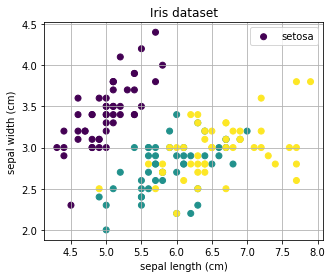

In [2]:
iris = datasets.load_iris()
print(iris.target)
print(iris.target_names)
  
plt.figure(figsize=(5,4))
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target, label=iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names, loc='upper right')
plt.title('Iris dataset')
plt.grid()
plt.show()

In [30]:
# use 2 input features to easily display in 2D, use first two output features (classes) for the problem to be binary 
x = iris.data[0:100,0:2]     # petal length and petal width
y = iris.target[0:100]

labels = ['setosa', 'versicolor', 'virginica']
print('Class labels:', np.unique(y))
print('Input features:\n', x[0:5,:])
print('Target features:\n',y[0:5])
print('Target classes: \n', np.unique(y))

# split the data into train and test folds
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)
print('Stratified:')
print(np.bincount(ytrain))
print(np.bincount(ytest))

Class labels: [0 1]
Input features:
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
Target features:
 [0 0 0 0 0]
Target classes: 
 [0 1]
Stratified:
[35 35]
[15 15]


In [32]:
# import Perceptron
N = 100
acc = []
for i in range(N):
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y)
  model = Perceptron(max_iter=100, eta0=0.01, validation_fraction=0.1)       
  # do not use random_state=42 (random seed) in both the model and train_test_split
  model.fit(xtrain, ytrain)
  y_pred = model.predict(xtest)
  score = model.score(xtest, ytest)
  acc.append(score)
  #print('%.2f' % score)

print('Model parameters: \nWeights: ' + str(model.coef_) + '\nBias: ' + str(model.intercept_))
print('Accuracy = ' + str(np.round(np.mean(acc), 2)) + '+/-' + str(np.round(np.std(acc), 2)))
print('Accuracy range = ['+str(np.round(np.mean(acc)+np.std(acc), 2)) +', '+str(str(np.round(np.mean(acc)-np.std(acc), 2)))+']')

Model parameters: 
Weights: [[ 0.277 -0.481]]
Bias: [-0.1]
Accuracy = 0.94+/-0.08
Accuracy range = [1.03, 0.86]


In [34]:
# MLP
x = iris.data     # petal length and petal width
y = iris.target

N = 20
acc = []
for i in range(N):
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y)
  ytrain = to_categorical(ytrain)
  ytest = to_categorical(ytest)
  
  model = MLPClassifier(hidden_layer_sizes=(8,5), max_iter = 1000, activation = 'relu', solver = 'adam',validation_fraction=0.1, verbose=False)
  model.fit(xtrain, ytrain)
  y_pred = model.predict(xtest)
  score = model.score(xtest, ytest)
  #print('%.2f' % score)
  acc.append(score)

print('Accuracy = ' + str(np.round(np.mean(acc), 2)) + '+/-' + str(np.round(np.std(acc), 2)))
print('Accuracy range = ['+str(np.round(np.mean(acc)+np.std(acc), 2)) +', '+str(str(np.round(np.mean(acc)-np.std(acc), 2)))+']')

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron

Accuracy = 0.88+/-0.15
Accuracy range = [1.03, 0.74]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
#Calculate CI
import scipy.stats

confidence = 0.95  # Change to your desired confidence level
z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
print(z_value)

model.fit(xtrain, ytrain)

acc_test = model.score(xtest, ytest)
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / ytest.shape[0])

acc_test = np.round(acc_test, 3)
ci_length = np.round(ci_length,3)

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

print('CI = '+str(acc_test)+'+/-'+str(ci_length))
print('CI range = ['+str(ci_lower)+','+str(ci_upper)+' ]')

1.959963984540054
CI = 0.974+/-0.051
CI range = [0.9229999999999999,1.025 ]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
